# Tópicos de estatística aplicadas ao Direito. 

Autor: Felipe Navarro Romero Miguel.
Out. 2020.
Agradeço a G.M.N e a F.B. pelos comentários. 

# Amostragem e comparação de amostras I (distribuição normal)

###  Introdução

#### Objetivo

O objetivo desse notebook é tanto abordar didaticamente conceitos estatísticos no campo do direito por meio de suas aplicações práticas, quanto oferecer um roteiro e código (em Python 3) para a resolução desses tipos de questões.

Aqui trabalham-se as temáticas de: definição do tamanho da amostra, teste de normalidade da distribuição amostral (teste Shapiro-Wilk) e comparação entre amostras (teste-t).


#### Pergunta

A pergunta que notebook busca responder é: "Se, nas ações contra a Fazenda Pública, existe diferença no arbitramento de honorários em câmaras de um mesmo tribunal (ou de tribunais diversos) em causas de mesmo valor, considerando as hipóteses do art. 85 do CPC?". Optou-se aqui por lidar com causas de grande valor, ou seja, acima de 100.000 (cem mil) salários mínimos (art. 85, §3º, V, da lei de nº 13.105/2015) como exemplo; ainda assim, o procedimento para responder a essa questão pode ser aplicado para causas de qualquer valor.

Apesar desse notebook ter partido de uma pergunta em específico, o procedimento e código aqui desenvolvidos podem ser utilizados para outros tipos de trabalhos similares. Desde que as amostras sejam normais, pareadas e se a comparação se limite a duas amostras, ele pode ser utilizado para comparações de diversos objetos de interesse. Caso uma ou mais dessas condições esteja ausente, são necessárias modificações no procedimento apresentado.

#### Resumo do Procedimento

Para tanto procede-se da seguinte maneira: (I) "retira-se" uma amostra de casos (nesse notebook, foi gerada uma "amostra" aleatória numérica que busca refletir o valor dos honorários). (II) Realiza-se um teste de normalidade para verificar se a amostra segue uma distribuição normal. (III) Como o teste dará resultados positivos (já que, para esse notebook, a amostra gerada segue uma distribuição normal), realiza-se o teste t de Student pareado para comparar as amostras e verificar se suas médias são iguais. 

#### Explicação do procedimento

(I) Retira-se uma amostra considerando que é inviável se avaliar a população inteira (todas as causas das duas câmaras) de interesse, por limitações de tempo e recursos. Nós queremos que essa amostra seja pareada segundo o valor da causa e o tempo, isto é, queremos comparar honorários de causas de mesmo valor e decididas no mesmo período de tempo para que as diferenças encontradas sejam devidas a peculiaridades de cada órgão decisório. Queremos também que nossa amostra tenha algumas qualidades como a capacidade de identificar diferenças reais, quando estas existirem, na distribuição de honorários (chamaremos isso de **poder**). Queremos ainda que ela nos diga qual o "risco" dela apresentar uma diferença na distribuição de honorários que, em verdade, não reflete a sua população. Por fim, se houver uma diferença média no pagamento de honorários entre câmaras para causas de mesmo valor, queremos saber a magnitude dessa diferença (isto é, queremos saber o "tamanho do efeito"). Essas considerações são importantes para decidirmos o tamanho da amostra, utilizando uma fórmula apresentada abaixo.

(II) Nesse notebook, queremos que a amostra siga uma distribuição normal (algo bem comum), caso contrário, seria necessário fazer diversas modificações no procedimento abaixo. De qualquer maneira, será feito teste de normalidade, isto é, teste para indicar se as amostras segue ou não uma distribuição normal porque é recomendável que essa etapa seja feita sempre nesse tipo de análise para se decidir qual o teste comparativo mais adequado.

(III) O teste t de Student pareado é um teste estatístico usado para se indicar se devemos ou não rejeitar a hipótese nula (H0) de que inexiste diferença entra as médias das nossas populações sob análise. Ele pressupõem uma distribuição amostral t, mas, como nossa amostra é maior do que 30 elementos, a distribuição t é próxima de uma distribuição normal.

#### Sobre o glossário

Para garantir que o procedimento abaixo seja e fácil compreensão, criou-se um glossário  para explicar (ou exemplificar) termos de estatística inferencial relevantes.  

#### última observação
Ao invés de vígulas, a separação decimal se dará por ponto, dado que assim funciona a linguagem original do python 3.

### Bibliotecas
Antes de começar é necessário se importar as bibliotecas do Python utilizadas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import t

### Definições importantes (glossário)

**d de Cohen**: é uma medida do tamanho do efeito. Há diferentes formas de se classificar o tamanho do efeito; uma medida mais contemporânea, atualizando com base em novas pesquisas a divisão originária de Cohen, é apresentada em Sawilowsky com tamanhos de efeito variado de "bem pequenos" (d.01) a "imensos" (d2.0), com o valor "médio" de d0.5 (2009, p. 599). Em amostras pareadas, como é o caso nesse caderno, o "D de Cohen" se calcula usando a média das diferenças e o desvio padrão das diferenças conforme a fórmula (Lakens, 2013, p. 4):

$$\ Cohen\ d_{z} = \frac{M_{diff}}{\frac{\sqrt{\sum({X_{diff} - M_{diff}})2}}{N - 1}} $$

Existem outros métodos de mensurar tamanho do efeito, mas se optou por utilizar o d de Cohen por causa de sua simplicidade e difusão.  

**Distribuição normal (Gaussiana)**: uma distribuição de probabilidade em formato de "sino", centrada na média (que, no caso da distribuição normal, é idêntica a mediana e a moda) e simétrica a direita e a esquerda desta. Ela é de grande importância estatística, não só por ser comum, como também a *distribuição das médias de amostras grandes tende a ser normal* (teorema do central do limite). A distância de um valor, medida em desvios padrões, em relação à média de uma distribuição normal é chamada de "z-score" (Z); ela é muito importante considerando que, em uma distribuição normal, a área embaixo da curva entre uma Z score de -1.96 e de + 1.96 desvio padrão contém 95% dos valores de uma distribuição normal. O valor associado a Z-score, bem como a área entre este e a média pode ser encontrado nas tabelas de distribuição Z.

**Distribuição t de Student**: uma distribuição similar a normal, mas com caudas maiores, podendo apresentar valores mais distantes da média. Aqui, ao invés de "Z score", utiliza-se da medida "t score", com uma tabela apropriada. Em se tratando de amostras "grandes" (n > 30), ela é similar a uma distribuição normal, como é demonstrado no gráfico infra. 

**Hipótese nula ($\ H_{0}$)**: é a hipótese que procuramos rejeitar por meio do teste estatístico considerando a hipótese alternativa (H1) de nosso interesse. 

**Intervalo de confiança (I.C)**: é um intervalo que contém um conjunto de valores de uma dada distribuição. Em uma distribuição normal, o intervalo de confiança, para um valor $ \alpha = $ 5%, contém 95% dos valores observados na nossa amostra. 

**Nível de significância (alfa)**: trata-se da probabilidade de se rejeitar a hipótese nula se esta for verdadeira (a rejeição da hipótese nula quando esta é verdadeira é conhecido como erro de tipo I). Geralmente o valor adotado de alfa é de 5%.

**Poder do teste (1 - beta)**: é a probabilidade de se rejeitar a hipótese nula quando esta for falsa. Geralmente adotam-se os valores de 20% ou 10% para *beta* (importante destacar que beta **não** é o símbolo do poder de teste, mas sim o símbolo que identifica erro de tipo II - a possibilidade de se aceitar a hipótese nula quando esta for falsa -, portanto, dizer que o poder de teste é de 80% significa dizer que há uma chance de 20% de falhar em rejeitar a hipótese nula).

**Tamanho do efeito (effect size ou ES)**: De acordo com Cohen (1992, p. 99), tamanho do efeito é um valor que mede a diferença entre a hipótese nula e a hipótese alternativa, podendo aparecer, por exemplo, na forma de desvio padrão ou de proporção. 

**Testes bicaudais e monocaudais**: o objetivo desses tipos de teste é verificar o quão distante o valor obtido está da média de uma distribuição (ou seja, o quão próximo ele está de uma das extremidades ou "caudas"). Se o valor encontrado estiver muito distante da média (prevista pela hipótese nula), é provável que ele pertença a uma distribuição distinta (prevista pela hipótese alternativa). O teste é bicaudal quando se avalia a proximidade do valor de *qualquer* uma das duas caudas e monocaudal quando se verifica a proximidade de *somente* uma das caudas.

**Valor p**: é um valor que nos diz o quão provável é a hipótese nula (normalmente, para se rejeitar a hipótese nula, adotam-se valores p menores que 0.05 ou 0.01).

#### Possíveis enganos
Alguns enganos que devem ser evitados:

    Significância estatística não é a mesma coisa que tamanho do efeito. A primeira é uma medida estatística sobre a relação entre a hipótese nula e alternativa; o segundo é uma medida da dimensão - o tamanho - do efeito de algo que se procura avaliar. Em outros termos, há diferença entre dizer que "nossas medidas obtidas são discrepantes com a hipótese nula" e dizer "o efeito que buscamos descobrir é substancial ou relevante".

    A diferença das médias é distinto da média das diferenças (o mesmo valendo para o desvio padrão). O que significa que o tamanho do efeito ("dz de Cohen") para amostras pareadas se calcula de modo distinto do utilizado para amostras independentes (não-pareadas).
    
    Um intervalo de confiança de 95% *não* significa que o valor real do parâmetro (isto é, a característica da população como sua média) tenha 95% de chance de estar dentro do intervalo construído. O que o I.C. de 95% significa é que, se retiradas 100 amostras aleatórias de mesmo tamanho (n), então o parâmetro populacional real estará dentro em 95 dos intervalos construídos.

#### Exemplificando uma distribuição normal:

Utiliza-se aqui a biblioteca scipy.stats.norm e scipy.stats.t que apresentam códigos básicos para gerar distribuições normais e t. Nota-se que, quanto maior o tamanho da amostra, mais a distribuição t se aproxima da normal.


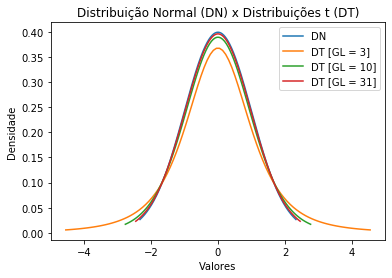

In [2]:
DN = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)

df1 = 3
df2 = 10
df3 = 31
DT1 = np.linspace(t.ppf(0.01,df1), t.ppf(0.99, df1), 100)
DT2 = np.linspace(t.ppf(0.01,df2), t.ppf(0.99, df2), 100)
DT3 = np.linspace(t.ppf(0.01,df3), t.ppf(0.99, df3), 100)

plt.plot(DN, norm().pdf(DN))
plt.plot(DT1, t.pdf(DT1, df1))
plt.plot(DT2, t.pdf(DT2, df2))
plt.plot(DT3, t.pdf(DT3, df3))

plt.title('Distribuição Normal (DN) x Distribuições t (DT)')
plt.xlabel('Valores')
plt.ylabel('Densidade')

plt.legend(("DN", "DT [GL = 3]", "DT [GL = 10]", "DT [GL = 31]"))



### Definindo o tamanho da amostra.

A primeira coisa a se fazer é determinar o tamanho da amostra necessária. Esta é definida tendo em vista o nível de significância ($ alpha $) desejado e o poder ($ 1 - \beta$) do teste. Esses valores são importantes para que as medidas sejam representativas da população, isto é, reflitam a totalidade dos honorários distribuídos, não somente os das amostras.

Utilizando da fórmula apontada em Campbel et. al. (1995, p. 1148), segundo o qual o tamanho da amostra (m) depende nível de significância ($\alpha$), o poder ($1-beta$), "d" (que é a diferença média - $\delta$ - dívida pelo desvio padrão das medidas - $\sigma$ -):

$$\ {m} =  {2*\frac {({\ {Z}_{1 - \frac{\alpha}{2}} + \ {Z}_{1 - \beta}})^2}{(d)^2}} + { \frac {Z^2_{1 - \frac{\alpha}{2}}}{4}} $$ 

Segundo os autores (Ibid., p. 1148), "o último termo da equação é um fator de correção para permitir o uso de tabelas  Normais ao invés de tabelas t e pode ser ignorado exceto para amostras de tamanho muito pequeno" ("The last term in the equation is a correction factor to enable Normal tables rathar than t to be used and can be ignored except for very small sample sizes."). Ressalta-se que esse estudo é feito para amostras não pareadas, o que deveria ser trabalhado em outro estudo (Ibid., p. 1145).

Isso significa que são necessárias modificações na fórmula acima para amostras pareadas. Primeiramente, como não se pretende trabalhar com amostras muito pequenas, pode-se ignorar o segundo termo da equação. Ainda, a amostra deve ser de pares, não somente de participantes individuais por grupo, o que se corrige dividindo a equação por dois. Além disso, "d" - "diferença padronizada" ("standardised difference d") para os autores (Ibid, p. 1145) - deve ser substituída pelo "dz de Cohen" acima explicitado para casos com amostras pareadas. Vamos também modificar o símbolo do tamanho da amostra (m) para número de pares (np)

$$\ {{n}_{p}} =  {\frac {({\ {Z}_{1 - \frac{\alpha}{2}} + \ {Z}_{1 - \beta}})^2}{({d}_{z})^2}}  $$ 

Já foi definido que a amostra é pareada, por convenção digamos que o nível e significância seja de 5%, para um teste bicaudal ($ |Z| = 1,96 $), o poder de 80% (0,84) e que a magnitude desejada do efeito ("D de Cohen") seja de 0.5 (haja uma diferença de "tamanho médio" entre os valores pareados; na prática estamos dizendo que a diferença entre as médias das diferenças é de meio desvio padrão, o quão relevante esse efeito é depende de considerações práticas e dos valores obtidos). Calcula-se que o tamanho da amostra será de aproximadamente 32 pares:


In [3]:
((2.8)**2)/((0.5)**2)

31.359999999999996

Antes de prosseguir, apesar do teste seguinte utilizar da distribuição t, como o tamanho da amostra é grande (n>30) podemos usar da fórmula acima.

### Gerando e testando as amostras aleatórias normais

Pode-se criar amostras com distribuição normal que simulem a distribuição de honorários entre câmaras. Cada amostra das câmaras possuem uma média de valores (loc), um desvio padrão (scale), isto é, uma medida de dispersão dos dados, e um tamanho (size).

Ainda, é necessário organizar as observações de maneira a parear os valores mais próximos. Isso é feito como o objetivo de simular a realidade de uma amostra pareada: como os valores abaixo são gerados artificialmente, ao invés de serem extraídos de observações reais, o pareamento de valores próximos acaba funcionando como uma forma de simular o que é provável se observar com valores reais. Em outras palavras, busca-se simular uma realidade em que a amostra “real” é colhida a partir de causas “reais”, com valores próximos ou idênticos e no mesmo período de tempo, então é provável que os valores arbitrados de honorários sejam próximos ainda que haja uma diferença real entre eles. Ressalta-se que isso não seria necessário em amostras já pareadas segundo os padrões já explicitados.

In [4]:
# Criando amostras aleatórias
C1 =  np.random.normal(loc=13000, scale = 4000, 
                      size = 32)
C2 = np.random.normal(loc=10000, scale = 2000, 
                      size = 32)
# Organizando as amostras
C1 = sorted(C1)
C2 = sorted(C2)

Passa-se ao teste Wilk-Shapiro ("teste W") de normalidade. Este teste tem por hipótese nula (H0) de que a distribuição sob análise é normal. Dada a complexidade da fórmula deste teste e para não prejudicar a compreensibilidade desse "caderno", optou-se por não escrever a fórmula infra; para verificar a fórmula do "teste W", sua demonstração, exemplificação e sua aplicação prática, vide Shapiro e Wilk (1965, p. 591-611). 

In [5]:
print(stats.shapiro(C1))
print(stats.shapiro(C2))

ShapiroResult(statistic=0.9908835291862488, pvalue=0.9932675361633301)
ShapiroResult(statistic=0.9772732853889465, pvalue=0.7173217535018921)


Visto que o valor p é substancialmente maior do que o convencional para se rejeitar a hipótese nula (isto é, p > 0.05), falha-se em rejeitar a hipótese nula de normalidade para ambas as amostras.

### Pareamento das amostras e teste t

Novamente, como aqui se gerou duas distribuições normais aleatórias, simula-se um pareamento “real” colocando os valores em ordem crescente e depois juntando estes em pares. Com isso, as diferenças entre valores arbitrados de honorários se deve a diferenças de julgamentos entre câmaras e não há diferenças entre valor de causas ou tempo de julgamento. 

Em seguida, realiza-se o teste t pareado sobre os valores. O teste passa da pressuposição (hipótese nula $\ H_{0}$) de que inexista diferença estatística entre as médias dos honorários entre as câmaras ($ \ M_{diff} = 0$); tendo por fórmula:

$$ \ {t} = \frac {M_{diff}}{\frac {S_{diff}}{\sqrt n}}  $$

Em que $\ M_{diff}$ é a média das diferenças das observações e $\ S_{diff}$ é o desvio padrão das diferenças (uma medida de dispersão das diferenças) e n é o número de pares. 

In [6]:
stats.ttest_rel(C1,C2)

Ttest_relResult(statistic=3.9376729182756676, pvalue=0.00043427376365068906)

Conforme se nota abaixo, o valor p obtido é muito inferior a 0.05, de modo que podemos rejeitar a hipótese nula - segundo a qual não haveria diferenças no valor dos honorários entre as câmaras -. 

 ### Mensurando o tamanho da diferença

Pelo procedimento acima sabemos que existe uma diferença no pagamento de honorários entre as câmaras. Se quisermos ainda descobrir qual a dimensão dessa diferença para esse caso em valores monetários então precisamos calcular o intervalo de confiança da média das diferenças. Isso porque o que temos é uma estimativa (uma estimação feita com base uma amostra), mas não o parâmetro verdadeiro (uma característica populacional) da média das diferenças. Com o intervalo de confiança podemos obter um conjunto de valores nos quais a média real pode se encontrar para amostras de tamanho 35 (35 pares e, portanto, 35 diferenças).

A fórmula para o intervalo de confiança para o limite superior é:

$$ \ {\mu} = M_{diff} + Z_{\frac{\alpha}{2}}*{\frac {S_{diff}}{\sqrt n}}  $$

A fórmula para o intervalo de confiança para o limite inferior é:

$$ \ {\mu} = M_{diff} - Z_{\frac{\alpha}{2}}*{\frac {S_{diff}}{\sqrt n}}  $$

Sendo $ \alpha $ = 5% então nosso intervalo de confiança é de [$ M_{diff} - 1,96*{\frac {S_{diff}}{\sqrt n}} $ , $ M_{diff} + 1,96*{\frac {S_{diff}}{\sqrt n}}  $].


In [7]:
C1 = np.array(C1)
C2 = np.array(C2)

C12M = np.mean(C1 - C2)
C12SD = np.std(C1 - C2)
CI12 = [C12M - 1.96*C12SD/np.sqrt(32), C12M + 1.96*C12SD/np.sqrt(32)]

print("Temos 95% de confiança que a média das diferenças dos honorários arbitrados entre as duas Câmaras se encontra no intervalo entre:",
      "R$", round(CI12[0],2), "e R$", round(CI12[1],2))


Temos 95% de confiança que a média das diferenças dos honorários arbitrados entre as duas Câmaras se encontra no intervalo entre: R$ 650.51 e R$ 1900.1


### Referências

COHEN, Jacob. (1992). Statistical Power Analysis. *Current Directions in Psychological Science*. Vol 1, n.3, 1992, p. 98-101. Disponível em: <http://www.jstor.org/stable/20182143>. Acesso em: 14 Out. 2020. 

LAKENS, Daniël. Calculating and reporting effect sizes to facilitate cumulative science: a practical primer for t-tests and ANOVAs. Frontiers in psychology, v. 4, p. 863, 2013. Disponível em: <https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00863/full#h10>. Acesso en: 14 Out. 2020.

CAMPBELL, Michael J.; JULIOUS, Steven A.; ALTMAN, Douglas G. Estimating sample sizes for binary, ordered categorical, and continuous outcomes in two group comparisons. *Bmj*, v. 311, n. 7013, p. 1145-1148, 1995. Disponível em: <https://www.jstor.org/stable/29729289>. Acesso em: 15 Out. 2020.

SAWILOWSKY, Shlomo S. "New Effect Size Rules of Thumb,". *Journal of Modern Applied Statistical Methods*, vol. 8, n. 2, 2009, p. 597-599. Disponível em: https://digitalcommons.wayne.edu/jmasm/vol8/iss2/26/?utm_source=digitalcommons.wayne.edu%2Fjmasm%2Fvol8%2Fiss2%2F26&utm_medium=PDF&utm_campaign=PDFCoverPages>. Acesso em: 14 Out. 2020.

SHAPIRO, S., WILK, M. (1965). An Analysis of Variance Test for Normality (Complete Samples). *Biometrika*, vol. 52, n. 3/4, p. 591-611. Disponível em: <https://www.jstor.org/stable/2333709>. Acesso em: 16 Out. 2020.
